In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [3]:
# #Import your data into a Pandas DataFrame.
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [4]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
city_data_df.describe()

,driver_count
count,120.000000
mean,24.775000
std,20.277678
min,1.000000
25%,7.000000
50%,20.500000
75%,38.250000
max,73.000000


In [6]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
U=sum(city_data_df["type"]=="Urban")
print('Urban= '+ str(U))
# Get the number of data points from the Urban cities.
S=sum(city_data_df["type"]=="Suburban")
print('Suburban= '+ str(S))
# Get the number of data points from the Urban cities.
R=sum(city_data_df["type"]=="Rural")
print('Rural= '+ str(R))

Urban= 66
Suburban= 36
Rural= 18


In [11]:
ride_data_df.head(10) 

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [12]:
ride_data_df.describe()

,fare,ride_id
count,2375.000000,2.375000e+03
mean,26.753112,4.887270e+12
std,12.109465,2.907361e+12
min,4.050000,3.218337e+08
25%,17.190000,2.381175e+12
50%,26.600000,4.748541e+12
75%,36.645000,7.461936e+12
max,58.550000,9.991538e+12


In [13]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
#Merge your DataFrames by city
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
"""Create a bubble chart that showcases the average fare versus the total number of rides with bubble 
size based on the total number of drivers for each city type, including urban, suburban, and rural."""
# Filter each type of city
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
print(urban_cities_df.head())
# Create the Urban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
print(suburban_cities_df.head())
# Create the Urban city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
print(rural_cities_df.head())

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  
               city                 date   fare        ride_id  driver_count  \
1625  Barronchester  2019-01-27 03:08:01  27.79  6653622887913            11   
1626  East Kentstad  2019-04-07 19:44:19  18.75  6575961095852            20   
1627      Lake Omar  2019-01-17 21:33:35  21.71   966911700371            22   
1628     Myersshire  2019-02-27 17:38:39  17.10  5706770909868            19   
1629    West Hannah  2019-04-19 01:06:59 

In [18]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
print(urban_ride_count.head())
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
print(suburban_ride_count.head())
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
print(rural_ride_count.head())

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [19]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
print(urban_avg_fare.head())
# Get average fare for each city in the urban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
print(suburban_avg_fare.head())
# Get average fare for each city in the urban cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
print(rural_avg_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


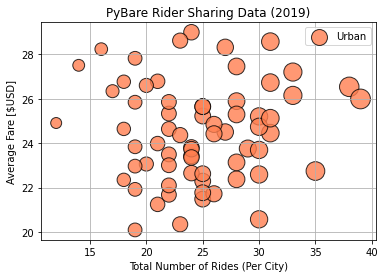

In [20]:
#Urban plot
fig, ax = plt.subplots()
ax.scatter(urban_ride_count, urban_avg_fare, color='coral', alpha=0.8, ec='black', lw=1, s=10*urban_ride_count, label='Urban')
# Format
ax.set_ylabel('Average Fare [$USD]')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_title('PyBare Rider Sharing Data (2019)')
ax.legend()
plt.grid(True)

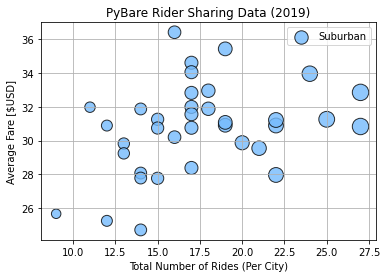

In [21]:
#Suburban plot
fig, ax = plt.subplots()
ax.scatter(suburban_ride_count, suburban_avg_fare, color='xkcd:sky blue', alpha=0.8, ec='black', lw=1, s=10*suburban_ride_count, label='Suburban')
# Format
ax.set_ylabel('Average Fare [$USD]')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_title('PyBare Rider Sharing Data (2019)')
ax.legend()
plt.grid(True)

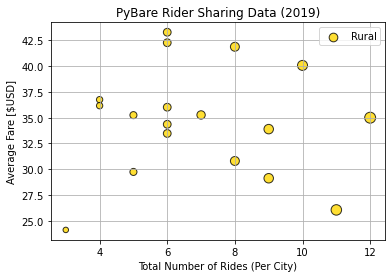

In [22]:
#Rural plot
fig, ax = plt.subplots()
ax.scatter(rural_ride_count, rural_avg_fare, color='gold', alpha=0.8, ec='black', lw=1, s=10*rural_ride_count, label='Rural')
# Format
ax.set_ylabel('Average Fare [$USD]')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_title('PyBare Rider Sharing Data (2019)')
ax.legend()
plt.grid(True)

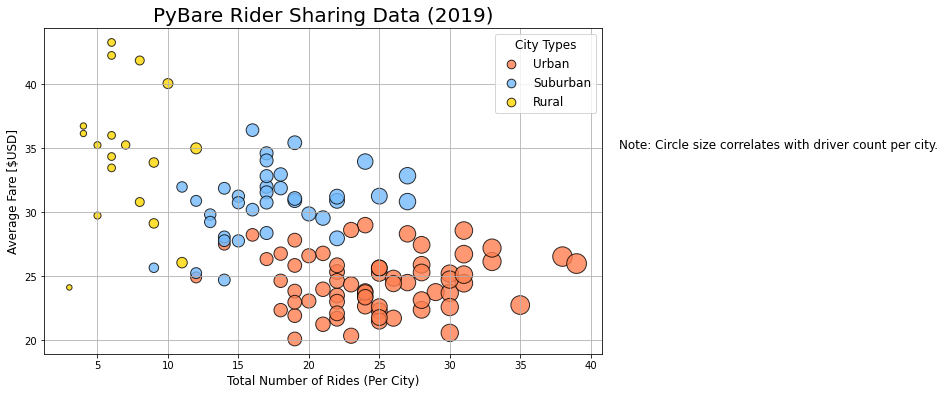

In [23]:
# Add the scatter charts for each type of city.
#plt.subplots(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))
"""plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, c="coral",ec="black", lw=1,alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, c="skyblue",ec="black", lw=1,alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count, c="gold",ec="black", lw=1,alpha=0.8, label="Rural")"""
ax.scatter(urban_ride_count, urban_avg_fare, color='coral', alpha=0.8, ec='black', lw=1, s=10*urban_ride_count, label='Urban')
ax.scatter(suburban_ride_count, suburban_avg_fare, color='xkcd:sky blue', alpha=0.8, ec='black', lw=1, s=10*suburban_ride_count, label='Suburban')
ax.scatter(rural_ride_count, rural_avg_fare, color='gold', alpha=0.8, ec='black', lw=1, s=10*rural_ride_count, label='Rural')
# Format
"""plt.ylabel('Average Fare [$USD]', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.title('PyBare Rider Sharing Data (2019)', fontsize=20)
plt.legend()"""
ax.set_ylabel('Average Fare [$USD]', fontsize=12)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=12)
ax.set_title('PyBare Rider Sharing Data (2019)', fontsize=20)
ax.legend()
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# First save then show, otherwise blank image will be saved!!
# Save the figure.
plt.savefig('Analysis/Fig1.png')
# Show the plot
plt.show()

In [24]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_driver_count.head())
# Get the average number of drivers for each urban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
print(suburban_driver_count.head())
# Get the average number of drivers for each urban city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
print(rural_driver_count.head())

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


In [25]:
# Get summary statistics urban city.
print(urban_cities_df.describe())
# Get summary statistics suburban city.
print(suburban_cities_df.describe())
# Get summary statistics rural city.
print(rural_cities_df.describe())

              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000
             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000
             fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.8878

In [ ]:
#Determine the mean, median, and mode for the following:
##The total number of rides for each city type.

In [27]:
# Get summary statistics urban ride.
print(urban_ride_count.describe())
# Get summary statistics suburban ride.
print(suburban_ride_count.describe())
# Get summary statistics rual ride.
print(rural_ride_count.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [28]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [29]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [31]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(),rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [32]:
import scipy.stats as sts

In [36]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
print('--------')
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
print('--------')
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
--------
The mean for the ride counts for suburban trips is 24.62.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
--------
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [40]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df['fare']
suburban_fares=suburban_cities_df['fare']
rural_fares=rural_cities_df['fare']
##The average fares for each city type.
round(urban_fares.mean(),2), round(suburban_fares.mean(),2), round(rural_fares.mean(),2)

(24.53, 30.97, 34.62)

In [42]:
##The median fares for each city type.
round(urban_fares.median(),2), round(suburban_fares.median(),2), round(rural_fares.median(),2)

(24.64, 30.75, 37.05)

In [43]:
# Calculate the mode of the fare for each city type. all modes in the series
urban_fares.mode(), suburban_fares.mode(),rural_fares.mode()

(0    22.86
 dtype: float64,
 0    17.99
 1    23.06
 2    35.76
 3    41.85
 dtype: float64,
 0    37.05
 1    51.80
 2    54.66
 dtype: float64)

In [45]:
# Calculate the mode of the fare for each city type v2. how many are there per mode
print(sts.mode(urban_fares))
print(sts.mode(suburban_fares))
print(sts.mode(rural_fares))

ModeResult(mode=array([22.86]), count=array([5]))
ModeResult(mode=array([17.99]), count=array([3]))
ModeResult(mode=array([37.05]), count=array([2]))


In [52]:
# Get the drivers for the urban cities.
urban_drivers=urban_cities_df['driver_count']
suburban_drivers=suburban_cities_df['driver_count']
rural_drivers=rural_cities_df['driver_count']
##The total number of drivers for each city type.
urban_drivers.sum(), suburban_drivers.sum(), rural_drivers.sum()

(59602, 8570, 537)

In [53]:
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [54]:
##The average drivers for each city type.
round(urban_drivers.mean(),2), round(suburban_drivers.mean(),2), round(rural_drivers.mean(),2)

(36.68, 13.71, 4.3)

In [55]:
##The median drivers for each city type.
round(urban_drivers.median(),2), round(suburban_drivers.median(),2), round(rural_drivers.median(),2)

(37.0, 16.0, 4.0)

In [56]:
# Calculate the mode of the drivers for each city type. all modes in the series
urban_drivers.mode(), suburban_drivers.mode(),rural_drivers.mode()

(0    39
 dtype: int64,
 0    20
 dtype: int64,
 0    1
 dtype: int64)

In [61]:
# Calculate the mode of the drivers for each city type v2. how many are there per mode
print(sts.mode(urban_drivers))
print(sts.mode(suburban_drivers))
print(sts.mode(rural_drivers))

ModeResult(mode=array([39], dtype=int64), count=array([86]))
ModeResult(mode=array([20], dtype=int64), count=array([79]))
ModeResult(mode=array([1], dtype=int64), count=array([32]))


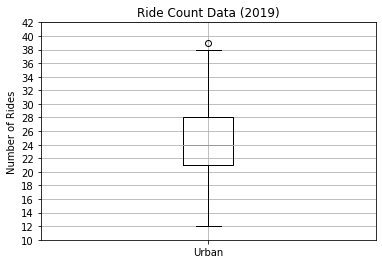

In [75]:
#Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
##The number of rides for each city type.
# Create a box-and-whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
x_labels = ["Urban"]
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
#ax.set_xlabel('Urban')
ax.set_yticks(np.arange(10, 43, step=2.0))
ax.grid()
plt.show()

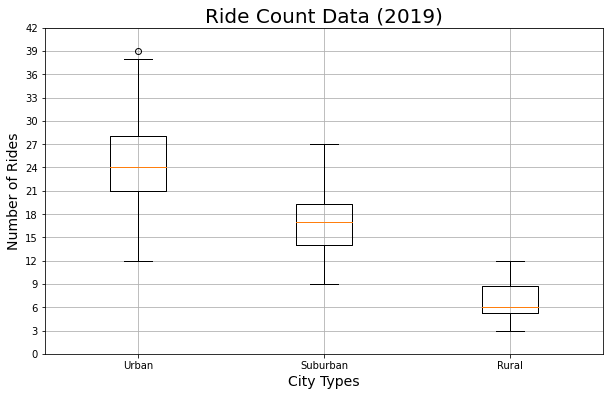

In [77]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
#ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [78]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


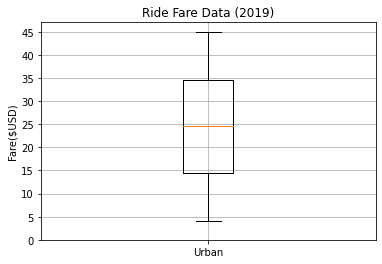

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [93]:
#Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
##The fares for each city type.
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 50, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

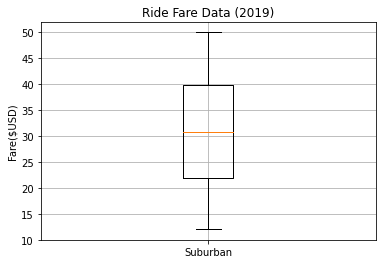

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [90]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 55, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

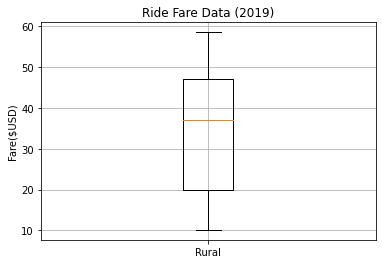

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [92]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
#ax.set_yticks(np.arange(10, 65, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

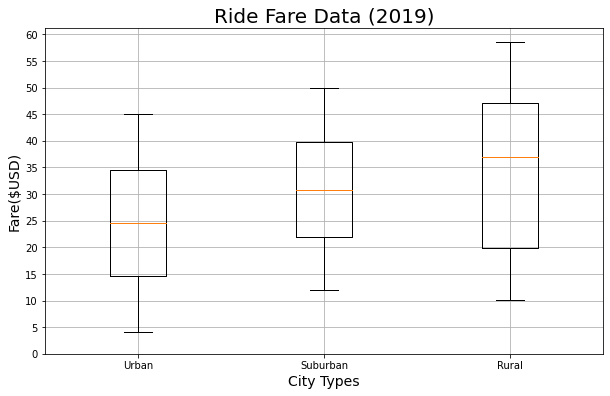

In [115]:
# Create a box-and-whisker plot for the all fare data.
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fares_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

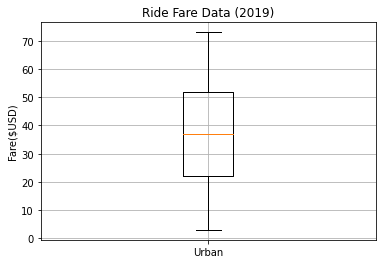

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [103]:
#Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
##The number of drivers for each city type.
# Create a box-and-whisker plot for the urban driver data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 80, step=10.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

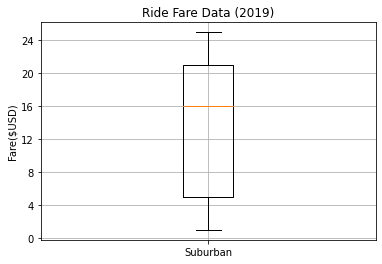

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [105]:
##The number of drivers for each city type.
# Create a box-and-whisker plot for the suburban driver data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 28, step=4.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

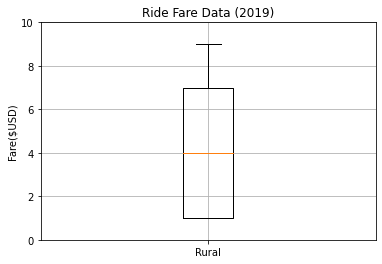

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [102]:
##The number of drivers for each city type.
# Create a box-and-whisker plot for the rural driver data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 12, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

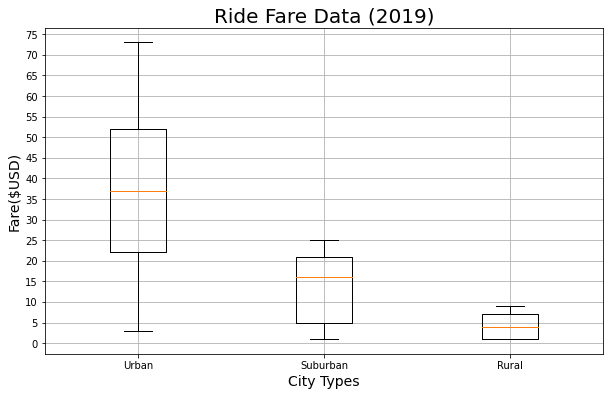

In [114]:
# Create a box-and-whisker plot for the all drivers data.
x_labels = ["Urban", "Suburban","Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(drivers_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

In [ ]:
#Create a pie chart that visualizes each of the following data for each city type:
##The percent of total fares.
##The percent of total rides.
##The percent of total drivers.